# CPE 490/590: Machine Learning for Engineering Applications
## Instructor and Author of this notebook: Rahul Bhadani

# Synthetic Data Generation: Discrete Random Variables
Synthetic datasets from distributions discussed in the lecture can be generated using `scipy.stats.rv_discrete` . Below is the code snippet that requires Python 3.8 or above followed by a stem plot showing the PMF of each distribution.

Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html

From the documentation:

`rv_discrete` is a base class to construct specific distribution classes and instances for discrete random variables. It can also be used to construct an arbitrary distribution defined by a list of support points and corresponding probabilities.

It allows you to sample a random number of that particular distribution you are specifying, thereby generating synthetic datasets that follow the given distribution.

In [14]:
import math
from scipy.stats import rv_discrete
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Serif'

# Uniform Discrete Distribution

In [15]:
x1k = np.arange(1,21)
y1k = np.repeat(1/20, 20) #uniform discrete

# Create a probability Mass Function
pmf1 = rv_discrete(name='uniform discrete', values=(x1k, y1k))


# Hypergeoemetric Distribution

In [18]:
# hypergeometric
N = 100,
M = 50
K = 10
x2k = np.arange(min(M,K))
y2k = np.zeros(min(M,K))
for i, x in enumerate(x2k):
    y2k[i] = (math.comb(M, x)*math.comb(N-M, K-x))/math.comb(N, K)
# because of numerical round off and how many samples we choose, sum of y2k is less than 1. So just normalize it
y2k =y2k/sum(y2k)

# Create a probability Mass Function
pmf2 = rv_discrete(name='hypergeometric', values=(x2k, y2k))

SyntaxError: cannot assign to literal (1073302344.py, line 2)

## Plot Probability Mass Function of the drawn random variables

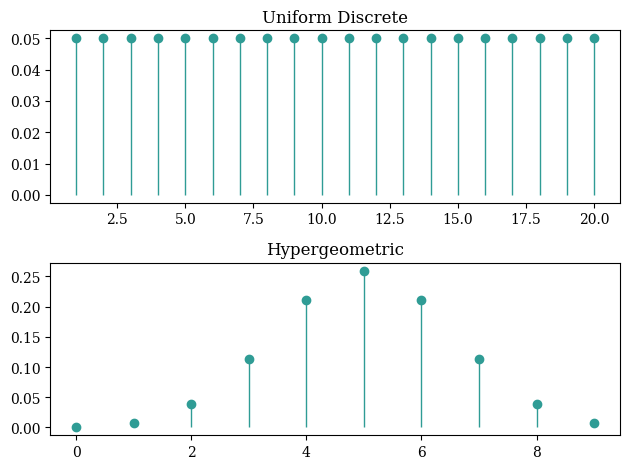

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1)
ax=np.ravel(ax)

ax[0].plot(x1k, pmf1.pmf(x1k), 'o', ms=6, mec='#2F9C95', markerfacecolor="#2F9C95")
ax[0].vlines(x1k, 0, pmf1.pmf(x1k), colors='#2F9C95', lw=1)
ax[0].set_title('Uniform Discrete')

ax[1].plot(x2k, pmf2.pmf(x2k), 'o', ms=6, mec='#2F9C95', markerfacecolor="#2F9C95")
ax[1].vlines(x2k, 0, pmf2.pmf(x2k), colors='#2F9C95', lw=1)
ax[1].set_title('Hypergeometric')

plt.tight_layout()
plt.show()

# Synthetic Data Generation: Continuous Random Variables
Synthetic datasets from continuous distributions discussed in the lecture can be generated using `scipy.stats.rv_continuous`. 


From the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html

`scipy.stats.rv_continuous` is a generic continuous random variable class meant for subclassing.

`rv_continuous` is a base class to construct specific distribution classes and instances for continuous random variables. It cannot be used directly as a distribution.

Below is the code snippet that requires Python 3.8. Code is followed by a histogram plot of the probability density function of some distributions discussed here.

In [1]:
import math
from scipy.stats import rv_continuous
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, factorial
import seaborn as s

# Exponential Distribution

In [2]:
class Exponential(rv_continuous):
    "Exponential"
    def __init__(self, beta, **kwargs):
        super().__init__(**kwargs)
        self.beta = beta


    def _pdf(self, x):
        if(x <=0):
            return 0

        y = (1.0/self.beta)*np.exp(-x/self.beta)
        return y

P2 = Exponential(name='Exponential', beta = 2.0)

# Sample 1000 numbers
B2 = P2.rvs(size = 1000)

/home/refulgent/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1950: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._pdf, _a, x, args=args)[0]


# Gamma Distribution


In [3]:
class Gamma(rv_continuous):
    "Gamma"
    def __init__(self, alpha, beta, **kwargs):
        super().__init__(**kwargs)
        self.alpha = alpha
        self.beta = beta

    def _pdf(self, x):
        if(x <=0):
            return 0

        y = (1.0/((self.beta**self.alpha)*gamma(self.alpha)))* np.exp(-x/self.beta)*(x**(self.alpha-1))
        return y

P3 = Gamma(name='Gamma', alpha = 1, beta = 0.5)

# Sample 1000 numbers
B3 = P3.rvs(size = 1000)

# Plot the Probability Density Function as Histogram

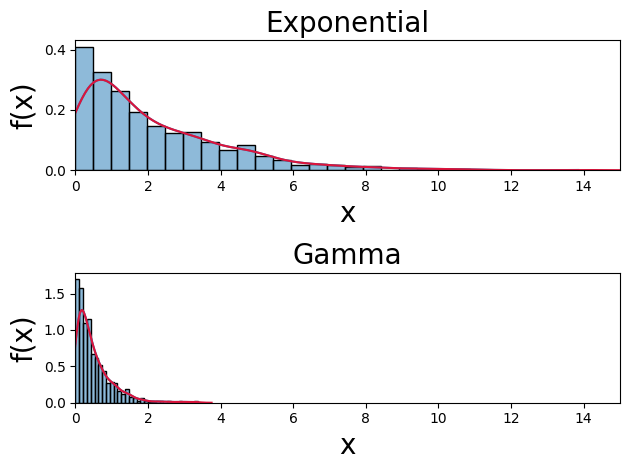

In [12]:
fig, ax = plt.subplots(2, 1)
ax=np.ravel(ax)
a= s.histplot(B2, ax = ax[0], stat = 'density', kde=True)
s.kdeplot(B2, color='crimson', ax=a)

ax[0].set_xlim([0, 15])
ax[0].set_xlabel('x',  fontsize = 20)
ax[0].set_ylabel('f(x)', fontsize =20)
ax[0].set_title('Exponential', fontsize =20)

a = s.histplot(B3, ax = ax[1], stat = 'density', kde=True)
s.kdeplot(B3, color='crimson', ax=a)

ax[1].set_xlim([0, 15])
ax[1].set_xlabel('x',  fontsize = 20)
ax[1].set_ylabel('f(x)', fontsize =20)
ax[1].set_title('Gamma', fontsize =20)

plt.tight_layout()